In [11]:
import csv
import math
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# importing keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [12]:
forest_fires = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
forest_fires.head(5)
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [13]:
'''
If fire area > 0, set the value to 1 and change column name from area to label so that we can see it as a classification problem
'''
forest_fires['area'].values[forest_fires['area'].values > 0] = 1
forest_fires = forest_fires.rename(columns={'area': 'label'})

In [14]:
forest_fires.corr()
forest_fires.corr()['label'].sort_values(ascending=False)

label    1.000000
month    0.130329
DC       0.096724
temp     0.076047
FFMC     0.073823
DMC      0.062672
X        0.062491
Y        0.056892
wind     0.055702
ISI      0.035663
rain     0.025550
RH      -0.035587
day     -0.042970
Name: label, dtype: float64

In [15]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# load dataset
X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('GradientBoost',GradientBoostingClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('Bagging',BaggingClassifier()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('ExtraTrees',ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=100)
    cv_results = model_selection.cross_val_score(model, X, y,   cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.501667 (0.235673)
KNN: 0.540667 (0.239703)
CART: 0.505000 (0.243053)
NB: 0.505333 (0.296038)
SVM: 0.570000 (0.287769)
MLP: 0.517667 (0.301163)
GradientBoost: 0.530000 (0.251418)
AdaBoost: 0.545000 (0.216301)
Bagging: 0.518333 (0.254313)
RandomForest: 0.521000 (0.246471)
ExtraTrees: 0.515333 (0.235203)


In [16]:
firecsv=np.genfromtxt('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', delimiter=',', skip_header=True)
data = firecsv.tolist()
    
def calcAccuracy(predict, y_test):
    '''
    Calculate the accuracy of prediction with test data
    predict: result of prediction
    '''
    count=0
    pool=len(predict)
    for i in range(pool):
        if predict[i]==y_test[i]:
            count=count+1
    accuracy=count/pool
    return accuracy

def performSVM(split, train, test_sample):
   '''
   Use SVC to classify
   split: the number of training data, the number of test data will be 517-split
   SVM: C value for SVM
   train: the type of data for training: natural-1 or model-0
   '''
   X_train=[]
   y_train=[]
   X_test=[]
   y_test=[]

   for i in range(1, split):
      if train==0:
          X_train.append(data[i][4:8])
      if train==1:
          X_train.append(data[i][8:12])
      y_train.append(data[i][12])

   for i in range(split-1):
      y_train[i]=float(y_train[i])
      if y_train[i]>0:
          y_train[i]=1
      else:
          y_train[i]=0

   if test_sample > 0:
       for i in range(test_sample, 517):#split
            if train==0:
                X_test.append(data[i][4:8])
            if train==1:
                X_test.append(data[i][8:12])
            y_test.append(data[i][12])
    
       for i in range(517-test_sample):#split
            y_test[i]=float(y_test[i])
            if y_test[i]>0:
                y_test[i]=1
            else:
                y_test[i]=0
   else:
       for i in range(split, 517):#split
            if train==0:
                X_test.append(data[i][4:8])
            if train==1:
                X_test.append(data[i][8:12])
            y_test.append(data[i][12])
    
       for i in range(517-split):#split
            y_test[i]=float(y_test[i])
            if y_test[i]>0:
                y_test[i]=1
            else:
                y_test[i]=0
        
   '''
   Three kinds of SVM methods
   '''    
   clf_linear=svm.SVC(kernel='linear').fit(X_train,y_train)
   clf_rbf=svm.SVC(kernel='rbf').fit(X_train,y_train)
   clf_sigmoid=svm.SVC(kernel='sigmoid').fit(X_train,y_train)

   predict_linear = clf_linear.predict(X_test)
   predict_rbf = clf_rbf.predict(X_test)
   predict_sigmoid= clf_sigmoid.predict(X_test)

   a = calcAccuracy(predict_linear, y_test)
   b = calcAccuracy(predict_rbf, y_test)
   c = calcAccuracy(predict_sigmoid, y_test)
   return a, b, c

def drawTrendSVM(a,b,SVM_C,Type,test_sample):
    '''
    a is the lower bounder of training samples
    a: int; 0=<a<b
    b is the upper bounder of training samples
    b: int; a<b<517
    SVM_C is the C value for SVM
    SVM_C: int
    Type is for applying natural features-1 or model features-0 
    Type: int; C=0 or 1
    test_sample is to control the number of test samples to be the same
    test_sample: int; test_sample >=0
    '''
    assert isinstance(a, int)
    assert a>=0
    assert isinstance(b, int)
    assert b>=a
    assert b<517
    assert isinstance(SVM_C, int)
    assert isinstance(Type, int)
    assert Type==0 or Type==1
    assert isinstance(test_sample, int)
    assert test_sample>=0
    
    if test_sample==0:
        print('After training, use the rest as test data')
    else:
        print('test samples are from %d to 517'%(test_sample))
    for i in range(a,b):
        a, b, c= performSVM(i, Type, test_sample)
        plt.scatter(i, a, c='g')
        plt.scatter(i, b, c='r') 
        plt.scatter(i, c, c='y')
        plt.legend('LRS') 

    plt.xlabel('Sample number')
    if Type==0:
        print('This SVM applied features in the model: FFMC, DMC, DC and ISI')
        plt.ylabel('Accuracy of model features')
    else:
        print('This SVM applied natural features: temp, RH, wind and rain')
        plt.ylabel('Accuracy of natrual features')
    plt.title('Accuracy related to the number of training data and SVM method', va='bottom')
    plt.show()

In [24]:
def Give_prediction(temp_value, RH_value):
    '''
    The most suitable SVM method sigmoid kernel is used
    All the data is used as training data
    Use only two dominant natural features, temp and RH to make prediction
    The temp is between 0 and 35
    The RH is between 0 and 100 
    '''
    assert isinstance(temp_value, int)
    assert temp_value<35 and temp_value>0
    assert isinstance(RH_value, int)
    assert RH_value<100 and RH_value>0
    
    X_train=[]
    y_train=[]
    for i in range(517):
        X_train.append(data[i][8:10])
        y_train.append(data[i][12])
    
    for i in range(517):
      y_train[i]=float(y_train[i])
      if y_train[i]>0:
          y_train[i]=1
      else:
          y_train[i]=0
          
    clf_sigmoid=svm.SVC(kernel='sigmoid').fit(X_train,y_train)
    predict_rbf = clf_sigmoid.predict([[temp_value, RH_value]])
    if predict_rbf == 1:
        print('High probability of forest fire in this area for temp=%d and RH=%d.'%(temp_value, RH_value))
    if predict_rbf == 0:
        print('Low probability of forest fire in this area for temp=%d and RH=%d.'%(temp_value, RH_value))

After training, use the rest as test data
This SVM applied natural features: temp, RH, wind and rain


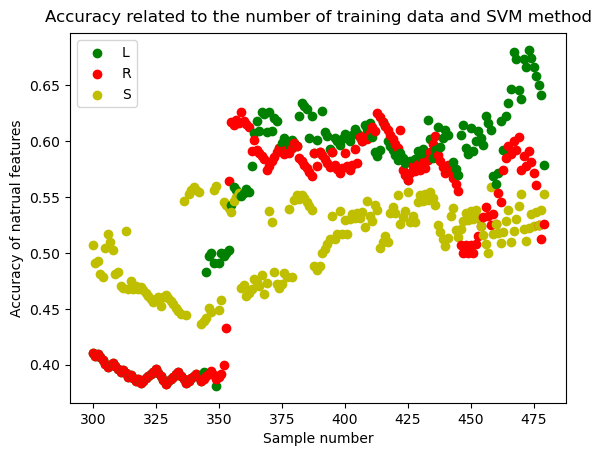

In [19]:
'''
Example function: 
This function will draw the trend of accuracy
The number of training data from 300 to 480
The C value for SVM is selected to be 1
Natural features will be used
After training, the rest of data will be used as test data
'''
drawTrendSVM(300,480,1,1,0)

After training, use the rest as test data
This SVM applied features in the model: FFMC, DMC, DC and ISI


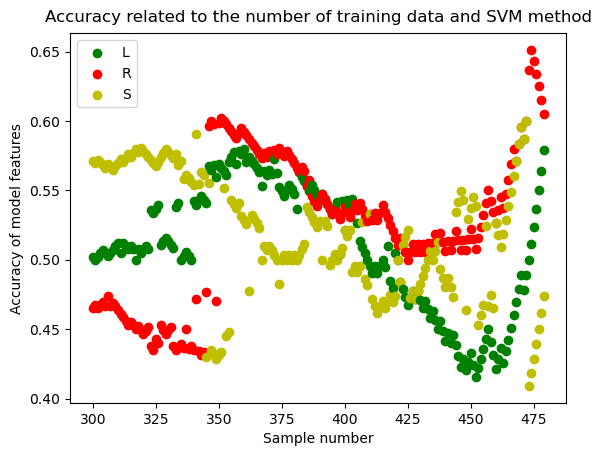

In [20]:
drawTrendSVM(300,480,1,0,0)

In [25]:
Give_prediction(25, 20)
Give_prediction(25, 80)

High probability of forest fire in this area for temp=25 and RH=20.
Low probability of forest fire in this area for temp=25 and RH=80.
